In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
Accidents = pd.read_csv('accidents_2012_to_2014.csv')

C:\Users\HP\.conda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
Accidents['Number_of_Casualties'].value_counts()

1     361626
2      70944
3      20379
4       7319
5       2691
6       1025
7        333
8        157
9         81
10        43
11        27
12        16
13        11
14         7
17         4
16         4
15         3
19         3
21         3
24         2
25         2
29         2
87         1
38         1
70         1
54         1
46         1
42         1
41         1
27         1
33         1
18         1
26         1
23         1
22         1
20         1
93         1
Name: Number_of_Casualties, dtype: int64

In [81]:
# This is not needed since our target variable has been changed to number of casualties
# converting accident severity to low(0) and high(1)
#print(Accidents['Accident_Severity'].value_counts()) 
#Accidents['Accident_Severity'] = Accidents['Accident_Severity'].replace([1,2,3], [0,0,1])
#Accidents
#print(Accidents['Accident_Severity'].value_counts()) 
#3    392610 === 1
#2     66784  === 0
#1      5303  == 0

In [82]:
Accidents['Road_Surface_Conditions'].isna().sum()
#755
rsc = Accidents['Road_Surface_Conditions'].value_counts().head(1)
Accidents['Road_Surface_Conditions'] = Accidents['Road_Surface_Conditions'].fillna('Dry')
#rsc
Accidents['Road_Surface_Conditions'].isna().sum()

0

In [83]:
Accidents['Special_Conditions_at_Site'].isna().sum()
#2
spes = Accidents['Special_Conditions_at_Site'].value_counts().head(1)
Accidents['Special_Conditions_at_Site'] = Accidents['Special_Conditions_at_Site'].fillna('None')
#spes
Accidents['Special_Conditions_at_Site'].isna().sum()

0

In [84]:
Accidents['Carriageway_Hazards'].isna().sum()
#3
carr = Accidents['Carriageway_Hazards'].value_counts().head(1)
Accidents['Carriageway_Hazards'] = Accidents['Carriageway_Hazards'].fillna('None')
Accidents['Carriageway_Hazards'].isna().sum()
#carr

0

In [85]:
Accidents['Did_Police_Officer_Attend_Scene_of_Accident'].isna().sum()
#2
pol = Accidents['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts().head(1)
Accidents['Did_Police_Officer_Attend_Scene_of_Accident'] = Accidents['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('Yes')
Accidents['Did_Police_Officer_Attend_Scene_of_Accident'].isna().sum()
#pol

0

In [86]:
Accidents['Time'].isna().sum()

13

In [87]:
Accidents['Time']

0         20:35
1         17:00
2         10:07
3         12:20
4         20:24
          ...  
464692    22:20
464693    06:40
464694    02:00
464695    06:55
464696    15:00
Name: Time, Length: 464697, dtype: object

In [88]:
Accidents['Time'] = Accidents['Time'].fillna('17:00')

Accidents['Time'].value_counts().head(1)

17:00    4622
Name: Time, dtype: int64

In [89]:
Accidents['Time'].isna().sum()

0

In [90]:
# Transforming the casualties column
def convert_number_of_casualties (x):
    if x >= 0 and x<=6:
        return 'Less than 7 casualties involved'
    elif x>6 and x<=17:
        return 'More than 6 & less than 18 casualties involved'
    else:
        return 'More than 17 casualties involved'
Accidents['Number_of_Casualties'] = Accidents['Number_of_Casualties'].apply(convert_number_of_casualties)

In [91]:
Accidents['Number_of_Casualties'].value_counts()

Less than 7 casualties involved                   463984
More than 6 & less than 18 casualties involved       686
More than 17 casualties involved                      27
Name: Number_of_Casualties, dtype: int64

In [92]:
# changing the values to numbers for the ml model.
Accidents['Number_of_Casualties'] = Accidents['Number_of_Casualties'].replace(['Less than 7 casualties involved','More than 6 & less than 18 casualties involved','More than 17 casualties involved'], [0,1,2])
Accidents['Number_of_Casualties'].value_counts()

0    463984
1       686
2        27
Name: Number_of_Casualties, dtype: int64

In [93]:
# TRANSFORMING THE TIME COLUMN
def transform(x):
    if (x >= 7) and (x < 19):
        return 'day'
    else:
        return 'night'

In [94]:
Accidents['Time'].value_counts().head(1)

17:00    4622
Name: Time, dtype: int64

In [95]:
Accidents['Time'].str.split(':').str[0].astype(int).apply(transform)

0         night
1           day
2           day
3           day
4         night
          ...  
464692    night
464693    night
464694    night
464695    night
464696      day
Name: Time, Length: 464697, dtype: object

In [96]:
Accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,0,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,0,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,0,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,0,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,0,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


In [97]:
Accidents.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,464697.000000,4.646970e+05,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,0.0,464697.000000,464697.000000,464697.000000,464697.000000
mean,443834.284222,2.986258e+05,-1.375156,52.575498,28.504051,2.833461,1.828086,0.001592,4.108740,329.123829,4.070136,1012.728324,38.229793,NaN,2.786293,380.952317,1.337426,2012.928140
std,94098.865933,1.594701e+05,1.382137,1.436370,25.334899,0.402029,0.708703,0.041305,1.916429,259.222621,1.413850,1810.523701,13.800546,NaN,3.187084,1289.786824,0.472832,0.834536
min,65510.000000,1.029000e+04,-7.509162,49.912941,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2012.000000
25%,379059.000000,1.777100e+05,-2.315799,51.484841,6.000000,3.000000,1.000000,0.000000,2.000000,95.000000,3.000000,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2012.000000
50%,445539.000000,2.606800e+05,-1.323374,52.232169,22.000000,3.000000,2.000000,0.000000,4.000000,300.000000,3.000000,147.000000,30.000000,NaN,3.000000,0.000000,1.000000,2013.000000
75%,525350.000000,3.989590e+05,-0.192935,53.485973,45.000000,3.000000,2.000000,0.000000,6.000000,511.000000,6.000000,759.000000,40.000000,NaN,6.000000,0.000000,2.000000,2014.000000
max,655370.000000,1.190858e+06,1.759382,60.597984,98.000000,3.000000,67.000000,2.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,NaN,6.000000,9999.000000,2.000000,2014.000000


In [98]:
Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         464697 non-nul

In [99]:
Accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [100]:
Accidents.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                                0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [101]:
Accidents.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Location_Easting_OSGR,1.000000,-0.443488,0.999394,-0.445512,-0.341086,0.033165,0.014412,-0.009655,-0.002260,-0.365255,-0.059309,-0.099017,-0.069761,NaN,0.057491,-0.024555,-0.108093,0.028422
Location_Northing_OSGR,-0.443488,1.000000,-0.452043,0.999974,0.153230,-0.031794,-0.032548,0.007387,0.006142,0.114367,0.053008,0.055043,0.064186,NaN,-0.047574,0.050909,0.063538,-0.049919
Longitude,0.999394,-0.452043,1.000000,-0.453969,-0.353312,0.033144,0.015349,-0.009559,-0.002335,-0.374428,-0.058011,-0.096585,-0.069084,NaN,0.057676,-0.022418,-0.106236,0.028124
Latitude,-0.445512,0.999974,-0.453969,1.000000,0.151249,-0.031863,-0.032358,0.007402,0.006144,0.112716,0.053068,0.055946,0.063912,NaN,-0.047352,0.051648,0.063078,-0.050133
Police_Force,-0.341086,0.153230,-0.353312,0.151249,1.000000,-0.039979,-0.005590,0.002601,-0.001216,0.982313,0.046606,0.007602,0.204729,NaN,-0.123164,-0.022331,0.248518,0.070912
Accident_Severity,0.033165,-0.031794,0.033144,-0.031863,-0.039979,1.000000,0.078750,-0.028997,0.003478,-0.043415,-0.000410,-0.007502,-0.073219,NaN,0.059245,0.022077,-0.079522,0.006445
Number_of_Vehicles,0.014412,-0.032548,0.015349,-0.032358,-0.005590,0.078750,1.000000,0.067354,0.003376,-0.001769,-0.147088,-0.008277,0.089665,NaN,0.064620,0.022293,0.044852,0.005481
Number_of_Casualties,-0.009655,0.007387,-0.009559,0.007402,0.002601,-0.028997,0.067354,1.000000,-0.001970,0.003265,-0.017868,0.000090,0.026350,NaN,-0.008939,-0.002308,0.019646,-0.001675
Day_of_Week,-0.002260,0.006142,-0.002335,0.006144,-0.001216,0.003478,0.003376,-0.001970,1.000000,-0.002014,0.004594,0.003172,-0.015876,NaN,0.011538,-0.000495,-0.018107,-0.002890
Local_Authority_(District),-0.365255,0.114367,-0.374428,0.112716,0.982313,-0.043415,-0.001769,0.003265,-0.002014,1.000000,0.056267,0.019247,0.212592,NaN,-0.124897,-0.018911,0.263910,0.071632


In [102]:
Accidents['Pedestrian_Crossing-Human_Control'].value_counts()

None within 50 metres                 462133
Control by other authorised person      1468
Control by school crossing patrol       1096
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [103]:
Accidents['Pedestrian_Crossing-Physical_Facilities'].value_counts()

No physical crossing within 50 meters          377099
Pedestrian phase at traffic signal junction     35165
non-junction pedestrian crossing                26572
Zebra crossing                                  14012
Central refuge                                  10369
Footbridge or subway                             1480
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

In [104]:
Accidents['Accident_Severity'].value_counts()

3    392610
2     66784
1      5303
Name: Accident_Severity, dtype: int64

In [105]:
Accidents['Number_of_Casualties'].value_counts()

0    463984
1       686
2        27
Name: Number_of_Casualties, dtype: int64

In [106]:
Accidents['Local_Authority_(District)'].value_counts()

300    7289
204    6255
91     4953
1      4738
102    4294
       ... 
915     214
57      113
941      84
936      76
933      63
Name: Local_Authority_(District), Length: 380, dtype: int64

In [107]:
Accidents['Local_Authority_(Highway)'].value_counts()

E10000016    13033
E10000017    12083
E10000030    11722
E10000012     9477
E10000014     8977
             ...  
EHEATHROW      113
S12000013       84
S12000027       76
S12000023       63
E06000053        7
Name: Local_Authority_(Highway), Length: 207, dtype: int64

In [108]:
Accidents['Speed_limit'].value_counts()

30    304842
60     64465
40     37538
70     31484
50     17312
20      9055
10         1
Name: Speed_limit, dtype: int64

In [109]:
Accidents['Location_Easting_OSGR'].value_counts()

533650    157
531170    118
530990     99
533470     96
530980     95
         ... 
613562      1
304389      1
308487      1
265488      1
524288      1
Name: Location_Easting_OSGR, Length: 166377, dtype: int64

In [110]:
Accidents['Location_Northing_OSGR'].value_counts()

181310    127
181170    109
180820    107
181890     99
180750     95
         ... 
441118      1
437020      1
163872      1
430875      1
552946      1
Name: Location_Northing_OSGR, Length: 185889, dtype: int64

In [111]:
Accidents['Longitude'].value_counts()

-0.104426    32
-0.120956    19
-0.217197    17
-0.163926    17
-0.066819    16
             ..
-1.557174     1
-0.843067     1
-1.074777     1
 0.179048     1
-1.628682     1
Name: Longitude, Length: 384094, dtype: int64

In [112]:
Accidents['Police_Force'].value_counts()

1     82701
13    16951
6     16621
43    16037
20    15556
4     15512
46    14929
44    13743
10    12698
47    12153
42    11908
50    11904
45    11722
5     11586
97    11040
7     10882
52     9962
14     9315
21     8461
31     8376
12     8261
16     7854
41     7596
33     7335
30     7211
22     7151
62     6956
32     6796
95     6452
35     6435
55     5461
36     5428
37     5247
3      5113
11     4918
23     4620
54     4496
60     4395
40     4357
63     3892
34     3705
17     2829
92     2747
53     2651
61     2499
93     1892
96     1580
91     1552
94     1253
48     1033
98      925
Name: Police_Force, dtype: int64

In [113]:
Accidents['Day_of_Week'].value_counts()

6    76054
5    70644
3    70316
4    69835
2    66725
7    60819
1    50304
Name: Day_of_Week, dtype: int64

In [114]:
Accidents['Time'].value_counts()

17:00    4622
17:30    4403
18:00    4173
16:00    4112
15:30    4018
         ... 
04:26      13
04:53      11
04:18      10
04:34      10
03:13      10
Name: Time, Length: 1439, dtype: int64

In [115]:
Accidents['1st_Road_Class'].value_counts()

3    216232
6    129695
4     59071
5     41796
1     16556
2      1347
Name: 1st_Road_Class, dtype: int64

In [116]:
Accidents['1st_Road_Number'].value_counts()

0       122749
1         5525
6         5095
4         4374
3         2905
         ...  
4648         1
8086         1
9106         1
7978         1
3715         1
Name: 1st_Road_Number, Length: 5321, dtype: int64

In [117]:
Accidents['Road_Type'].value_counts()

Single carriageway    351268
Dual carriageway       65998
Roundabout             31852
One way street          9074
Slip road               4827
Unknown                 1678
Name: Road_Type, dtype: int64

In [118]:
Accidents['Light_Conditions'].value_counts()

Daylight: Street light present               341124
Darkness: Street lights present and lit       91158
Darkeness: No street lighting                 22999
Darkness: Street lighting unknown              6853
Darkness: Street lights present but unlit      2563
Name: Light_Conditions, dtype: int64

In [119]:
Accidents['Weather_Conditions'].value_counts()

Fine without high winds       373167
Raining without high winds     57060
Other                           8272
Unknown                         8215
Raining with high winds         7120
Fine with high winds            5011
Snowing without high winds      2708
Fog or mist                     2411
Snowing with high winds          733
Name: Weather_Conditions, dtype: int64

In [120]:
Accidents['Road_Surface_Conditions'].value_counts()

Dry                          320125
Wet/Damp                     132745
Frost/Ice                      8140
Snow                           2824
Flood (Over 3cm of water)       863
Name: Road_Surface_Conditions, dtype: int64

In [121]:
Accidents['Special_Conditions_at_Site'].value_counts()

None                                               454387
Roadworks                                            4742
Mud                                                  1413
Ol or diesel                                         1406
Road surface defective                               1144
Auto traffic singal out                               758
Permanent sign or marking defective or obscured       625
Auto traffic signal partly defective                  222
Name: Special_Conditions_at_Site, dtype: int64

In [122]:
Accidents['Carriageway_Hazards'].value_counts()

None                                       456850
Other object in carriageway                  3148
Any animal (except a ridden horse)           2340
Pedestrian in carriageway (not injured)      1274
Involvement with previous accident            617
Dislodged vehicle load in carriageway         468
Name: Carriageway_Hazards, dtype: int64

In [123]:
Accidents['Urban_or_Rural_Area'].value_counts()

1    307896
2    156801
Name: Urban_or_Rural_Area, dtype: int64

In [124]:
df = Accidents.iloc[:, [5,6,7,10,11,14,15,16,17,22,23,24,25,26,27,28,29,30]]
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,3,2,5,20:35,3,308,Single carriageway,30,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes
1,1,3,2,4,17:00,4,412,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes
2,1,3,2,3,10:07,3,3220,One way street,30,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
3,1,3,1,4,12:20,5,0,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
4,1,3,1,3,20:24,4,325,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,98,2,2,1,22:20,2,74,Dual carriageway,70,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes
464693,98,3,2,5,06:40,2,74,Dual carriageway,70,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes
464694,98,3,1,3,02:00,4,721,Single carriageway,40,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes
464695,98,2,3,4,06:55,3,75,Single carriageway,60,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes


In [125]:
df.columns

Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Day_of_Week', 'Time', '1st_Road_Class', '1st_Road_Number', 'Road_Type',
       'Speed_limit', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

In [126]:
pchuman_control = pd.get_dummies(df['Pedestrian_Crossing-Human_Control'],drop_first=True)
pcphysical_facilities = pd.get_dummies(df['Pedestrian_Crossing-Physical_Facilities'],drop_first=True)
light_conditions = pd.get_dummies(df['Light_Conditions'],drop_first=True)
weather_conditions = pd.get_dummies(df['Weather_Conditions'],drop_first=True)
road_surface_conditions = pd.get_dummies(df['Road_Surface_Conditions'],drop_first=True)
Special_Conditions_at_Site = pd.get_dummies(df['Special_Conditions_at_Site'],drop_first=True)
Carriageway_Hazards = pd.get_dummies(df['Carriageway_Hazards'],drop_first=True)
Did_Police_Officer_Attend_Scene_of_Accident = pd.get_dummies(df['Did_Police_Officer_Attend_Scene_of_Accident'],drop_first=True)
Road_Type = pd.get_dummies(df['Road_Type'],drop_first=True)
Time = pd.get_dummies(df['Time'],drop_first=True)

df.drop(['Pedestrian_Crossing-Human_Control','Time','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Road_Type'],axis=1,inplace=True)
df

C:\Users\HP\.conda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Police_Force,Accident_Severity,Number_of_Vehicles,Day_of_Week,1st_Road_Class,1st_Road_Number,Speed_limit,Urban_or_Rural_Area
0,1,3,2,5,3,308,30,1
1,1,3,2,4,4,412,30,1
2,1,3,2,3,3,3220,30,1
3,1,3,1,4,5,0,30,1
4,1,3,1,3,4,325,30,1
...,...,...,...,...,...,...,...,...
464692,98,2,2,1,2,74,70,2
464693,98,3,2,5,2,74,70,2
464694,98,3,1,3,4,721,40,2
464695,98,2,3,4,3,75,60,2


In [127]:
df = pd.concat([df, pchuman_control, pcphysical_facilities, light_conditions, weather_conditions, road_surface_conditions, Special_Conditions_at_Site, Carriageway_Hazards, Did_Police_Officer_Attend_Scene_of_Accident, Road_Type],axis=1)
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Day_of_Week,1st_Road_Class,1st_Road_Number,Speed_limit,Urban_or_Rural_Area,Control by school crossing patrol,None within 50 metres,...,Involvement with previous accident,None,Other object in carriageway,Pedestrian in carriageway (not injured),Yes,One way street,Roundabout,Single carriageway,Slip road,Unknown
0,1,3,2,5,3,308,30,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,3,2,4,4,412,30,1,0,1,...,0,1,0,0,1,0,0,1,0,0
2,1,3,2,3,3,3220,30,1,0,1,...,0,1,0,0,1,1,0,0,0,0
3,1,3,1,4,5,0,30,1,0,1,...,0,1,0,0,1,0,0,1,0,0
4,1,3,1,3,4,325,30,1,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,98,2,2,1,2,74,70,2,0,1,...,0,1,0,0,1,0,0,0,0,0
464693,98,3,2,5,2,74,70,2,0,1,...,0,1,0,0,1,0,0,0,0,0
464694,98,3,1,3,4,721,40,2,0,1,...,0,1,0,0,1,0,0,1,0,0
464695,98,2,3,4,3,75,60,2,0,1,...,0,1,0,0,1,0,0,1,0,0


In [128]:
df.columns

Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Day_of_Week', '1st_Road_Class', '1st_Road_Number', 'Speed_limit',
       'Urban_or_Rural_Area', 'Control by school crossing patrol',
       'None within 50 metres', 'Footbridge or subway',
       'No physical crossing within 50 meters',
       'Pedestrian phase at traffic signal junction', 'Zebra crossing',
       'non-junction pedestrian crossing', 'Darkness: Street lighting unknown',
       'Darkness: Street lights present and lit',
       'Darkness: Street lights present but unlit',
       'Daylight: Street light present', 'Fine without high winds',
       'Fog or mist', 'Other', 'Raining with high winds',
       'Raining without high winds', 'Snowing with high winds',
       'Snowing without high winds', 'Unknown', 'Flood (Over 3cm of water)',
       'Frost/Ice', 'Snow', 'Wet/Damp', 'Auto traffic singal out', 'Mud',
       'None', 'Ol or diesel',
       'Permanent sign or marking defective or obscured',
     

In [129]:
# Assigning X and Y
X = df
Y = Accidents['Number_of_Casualties']

In [130]:
print(X.shape)
print(Y.shape)

(464697, 49)
(464697,)


In [131]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [132]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [133]:
# training 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\HP\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [135]:
predictions = logmodel.predict(X_test)
pd.DataFrame(predictions).head(50)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [136]:
cm_log = confusion_matrix(y_test, predictions)
cm_log

array([[139194,      0,      0],
       [   207,      0,      0],
       [     9,      0,      0]], dtype=int64)

<AxesSubplot:>

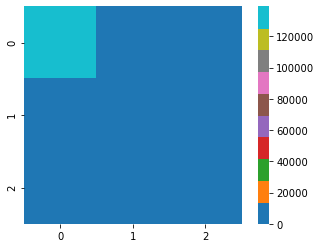

In [137]:
sns.heatmap(cm_log, vmin=None,vmax=None,cmap='tab10',center=None,robust=False,annot=None,fmt='.5g',annot_kws=None,linewidths=0,xticklabels='auto',
    yticklabels='auto',linecolor='white',square=True)

In [138]:
accuracy_score = accuracy_score(y_test, predictions)
print(accuracy_score*100)

99.84506132989026


In [139]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139194
           1       0.00      0.00      0.00       207
           2       0.00      0.00      0.00         9

    accuracy                           1.00    139410
   macro avg       0.33      0.33      0.33    139410
weighted avg       1.00      1.00      1.00    139410



C:\Users\HP\.conda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
print ('\nClassification report\n')
print (classification_report(y_test, predictions, target_names=['True Predictions', 'False Predictions ', 'False Predictions',]))


Classification report

                    precision    recall  f1-score   support

  True Predictions       1.00      1.00      1.00    139194
False Predictions        0.00      0.00      0.00       207
 False Predictions       0.00      0.00      0.00         9

          accuracy                           1.00    139410
         macro avg       0.33      0.33      0.33    139410
      weighted avg       1.00      1.00      1.00    139410

